## - Exercici 1

#### Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('preu lloguer per trimestre i barri.csv')

Observem les 5 primeres files del DataFrame

In [35]:
df.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


Busquem valors duplicats

In [36]:
df.duplicated().sum()

0

Busquem valors NaN

In [37]:
df.isnull().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

Ordenem els preus del lloguer mitjà i veiem dues coses: que hi ha valors faltants i que hi ha preus de lloguer molt baixos. Si ens fixem això és perquè hi ha dues categories: Lloguer mitjà per superfície i lloguer mitjà mensual. Eliminarem les files amb dels valors faltants (indicats amb --) i més tard filtrarem les dues categories per fer l'anàlisi.

In [38]:
Lloguers_ordenats = df.sort_values("Preu", ascending=True) 
Lloguers_ordenats.head(50)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
422,2021,3,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà per superfície (Euros/m2 mes),--
420,2021,3,8,Nou Barris,56,Vallbona,Lloguer mitjà per superfície (Euros/m2 mes),--
418,2021,3,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),--
265,2021,2,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),--
411,2021,3,8,Nou Barris,47,Can Peguera,Lloguer mitjà per superfície (Euros/m2 mes),--
130,2021,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà per superfície (Euros/m2 mes),--
57,2021,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),--
406,2021,3,7,Horta-Guinardó,42,la Clota,Lloguer mitjà per superfície (Euros/m2 mes),--
157,2021,2,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),--
187,2021,2,7,Horta-Guinardó,42,la Clota,Lloguer mitjà mensual (Euros/mes),--


In [39]:
Lloguers = df.drop(df[df['Preu'] == ('--')].index)

Lloguers.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0


Observem els tipus de dades que conté la taula

In [40]:
Lloguers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             540 non-null    int64 
 1   Trimestre       540 non-null    int64 
 2   Codi_Districte  540 non-null    int64 
 3   Nom_Districte   540 non-null    object
 4   Codi_Barri      540 non-null    int64 
 5   Nom_Barri       540 non-null    object
 6   Lloguer_mitja   540 non-null    object
 7   Preu            540 non-null    object
dtypes: int64(4), object(4)
memory usage: 38.0+ KB


Convertim el preu a float, no és correcte que sigui objecte

In [41]:
Lloguers['Preu'] = Lloguers['Preu'].astype('float64')
Lloguers['Preu'].dtype

dtype('float64')

Visualitzem una estadística ràpida

In [42]:
Lloguers.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri,Preu
count,540.0,540.000000,540.000000,540.000000,540.000000
mean,2021.0,2.503704,6.185185,36.459259,442.157222
std,0.0,1.119065,2.839387,21.371096,457.358745
min,2021.0,1.000000,1.000000,1.000000,6.700000
25%,2021.0,2.000000,3.000000,18.000000,12.775000
50%,2021.0,2.500000,7.000000,35.000000,232.750000
75%,2021.0,4.000000,8.000000,55.000000,815.875000
max,2021.0,4.000000,10.000000,73.000000,1816.500000


Amb la funció "describe" podem observar que el preu mínim (lloguer mitjà per superfície) és de 6.7€ i que el màxim, la mitjana del lloguer mensual d'algun barri, és de 1816,50 €. Després podem veure que només s'analitza l'any 2021.

#### Crea almenys una visualització per:

#### - Una variable categòrica (Districte o Barri)

In [43]:
Lloguers.Nom_Districte.value_counts()

Horta-Guinardó         80
Nou Barris             80
Sant Martí             80
Sants-Montjuïc         56
Sant Andreu            52
Eixample               48
Sarrià-Sant Gervasi    48
Gràcia                 40
Ciutat Vella           32
Les Corts              24
Name: Nom_Districte, dtype: int64

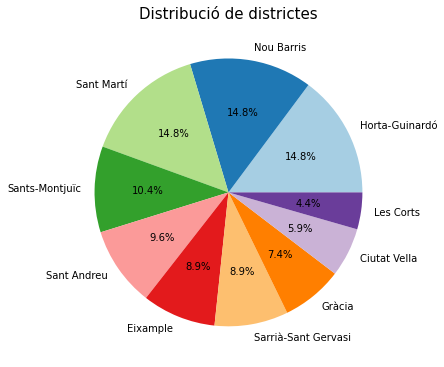

In [44]:
dist_counts = Lloguers['Nom_Districte'].value_counts()
plt.figure(figsize=(6,7))
plt.pie(dist_counts.values, labels=dist_counts.index, colors=sns.color_palette('Paired'), autopct='%1.1f%%')
plt.title('Distribució de districtes', fontsize=15)
plt.savefig('Dist_Districtes_pastis.png')
plt.show()

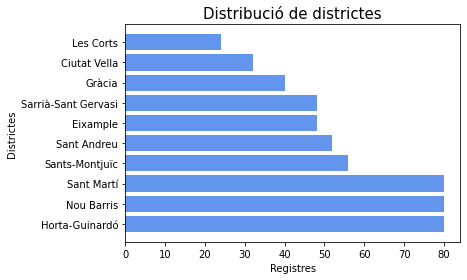

In [45]:
dist_counts = Lloguers['Nom_Districte'].value_counts()
fig, ax = plt.subplots()
ax.barh(dist_counts.index, dist_counts.values, color='cornflowerblue')
ax.set_title('Distribució de districtes', fontsize=15)
ax.set_xlabel('Registres')
ax.set_ylabel('Districtes')
plt.savefig('Dist_Districte_barres.png')
plt.show()

Observem que hi ha més registres dels districtes de Sant Martí, Nou Barris i Horta-Guinardó, la mateixa quantitat de fet. 

Ara comptem quants registres de cada categoria hi ha:

In [46]:
categories= Lloguers['Lloguer_mitja'].value_counts()
print(categories)

Lloguer mitjà mensual (Euros/mes)              270
Lloguer mitjà per superfície (Euros/m2 mes)    270
Name: Lloguer_mitja, dtype: int64


#### - Una variable numèrica (Preu)


In [47]:
#dos nous dataframes pel lloguer mitjà mensual i el lloguer mitjà per superfície
llog_mitja = Lloguers.loc[Lloguers.Lloguer_mitja == 'Lloguer mitjà mensual (Euros/mes)']

In [48]:
llog_msuper = Lloguers.loc[Lloguers.Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)']

Visualitzem dos histogrames del lloguer mitjà mensual i el lloguer mitjà per superfície

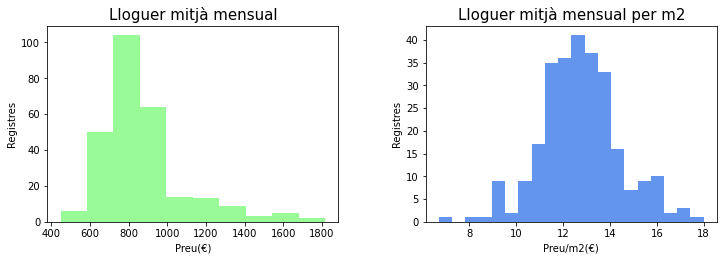

In [49]:

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].hist(llog_mitja['Preu'], bins=10, color='palegreen')
axs[0].set_title('Lloguer mitjà mensual',fontsize=15)
axs[0].set_xlabel('Preu(€)')
axs[0].set_ylabel('Registres')

axs[1].hist(llog_msuper['Preu'], bins=20, color='cornflowerblue')
axs[1].set_title('Lloguer mitjà mensual per m2', fontsize=15)
axs[1].set_xlabel('Preu/m2(€)')
axs[1].set_ylabel('Registres')

plt.subplots_adjust(wspace=0.3, bottom=0.2)

plt.savefig('Preu_preum2_lloguer.png')

Podem observar que la majoria de registres del preu mitjà de lloguer mensual se situen al voltant dels 800 euros. El preu mitjà per m2, en canvi té un un gran nombre de registres que són entre 12 i 14 euros/m2. 

#### - Una variable numèrica i una categòrica (Districte i Preu)

In [50]:
dist_mitja= llog_mitja.groupby(['Nom_Districte'])['Preu'].mean().sort_values(ascending=False)
dist_mitja.head(10)

Nom_Districte
Sarrià-Sant Gervasi    1271.212500
Les Corts              1214.066667
Eixample               1000.545833
Sant Martí              916.450000
Gràcia                  877.265000
Ciutat Vella            858.925000
Sants-Montjuïc          798.932143
Horta-Guinardó          765.007500
Sant Andreu             721.196154
Nou Barris              664.292500
Name: Preu, dtype: float64

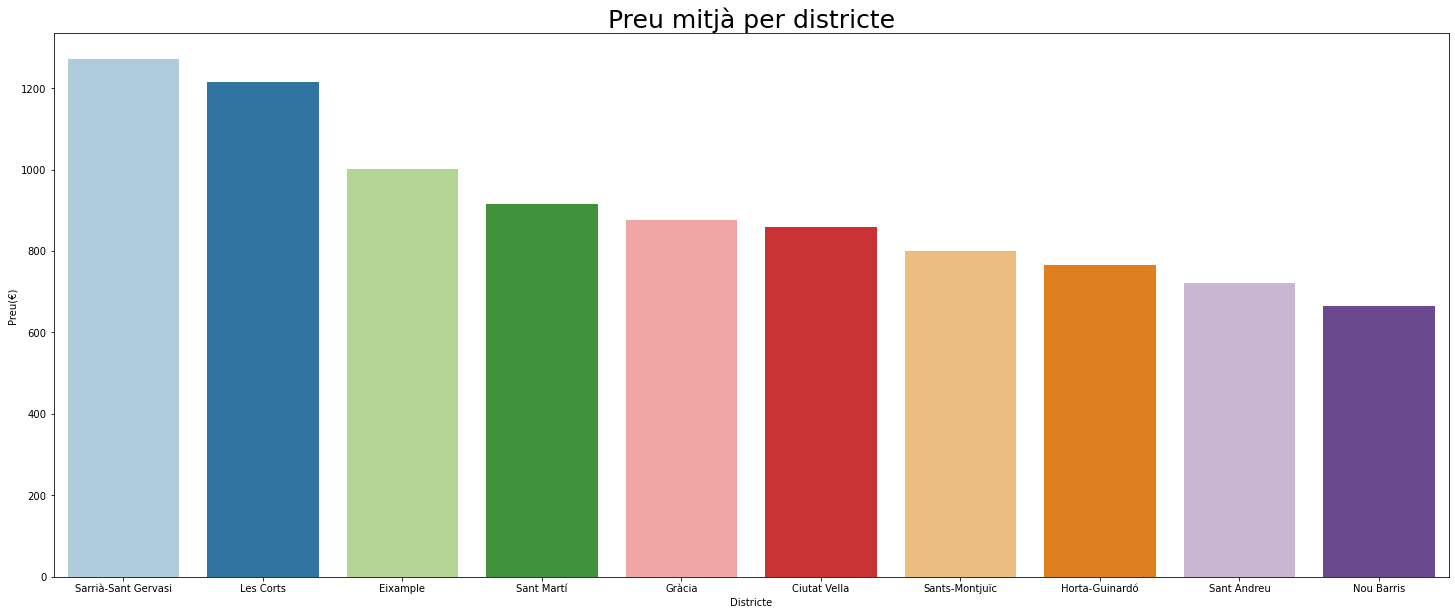

In [51]:
plt.figure(figsize=(25,10))
sns.barplot(x=dist_mitja.index, y=dist_mitja.values, order=dist_mitja.index, palette='Paired')
plt.title('Preu mitjà per districte', fontsize=25)
plt.xlabel("Districte")
plt.ylabel("Preu(€)")
plt.savefig('Preu_mitja_districte.png')
plt.show()


Si mirem la mitjana del preu del lloguer mensual per districte, El més car seria Sarrià-Sant Gervasi, seguit de Les Corts i l'Eixample. Quant als més econòmics, trobem Nou Barris, seguit per Sant Andreu i Horta-Guinardó.

In [52]:
dist_mitjam2 = llog_msuper.groupby(['Nom_Districte'])['Preu'].mean().sort_values(ascending=False)
dist_mitjam2.head(10)

Nom_Districte
Sarrià-Sant Gervasi    15.012500
Les Corts              14.008333
Ciutat Vella           13.775000
Sant Martí             13.440000
Gràcia                 13.380000
Eixample               13.300000
Sants-Montjuïc         12.678571
Horta-Guinardó         11.987500
Sant Andreu            11.153846
Nou Barris             10.922500
Name: Preu, dtype: float64

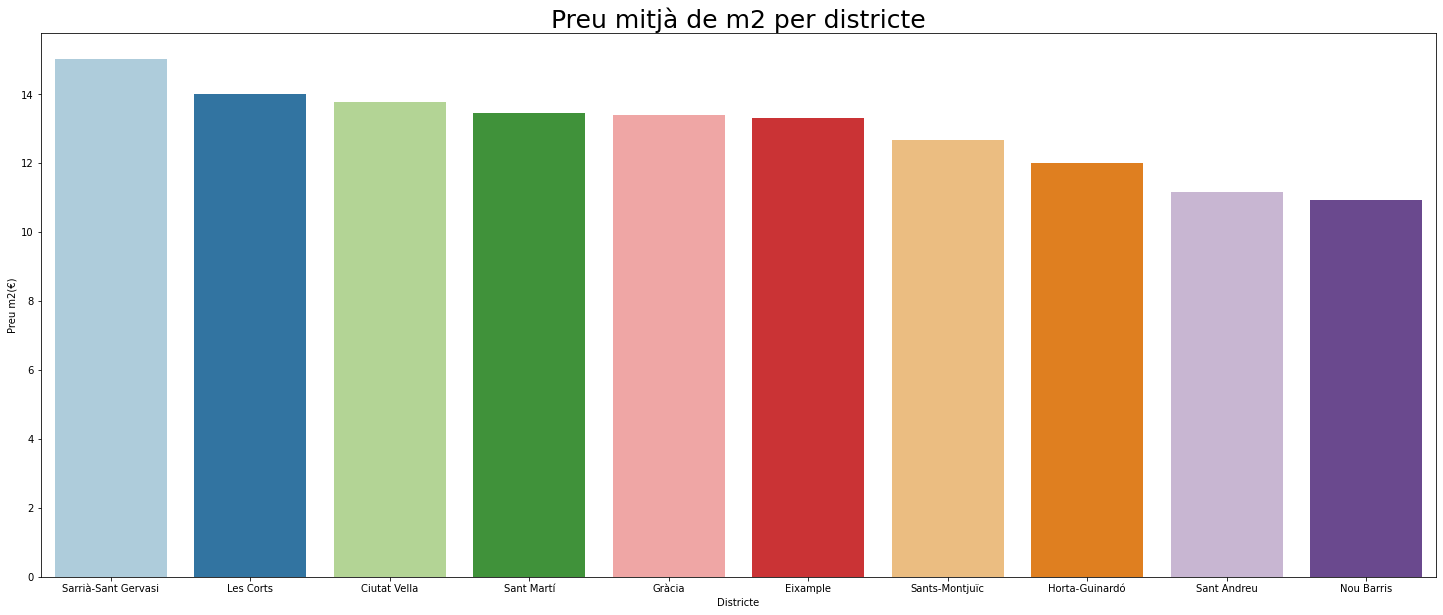

In [53]:
plt.figure(figsize=(25,10))
sns.barplot(x=dist_mitjam2.index, y=dist_mitjam2.values, order=dist_mitjam2.index, palette='Paired')
plt.title('Preu mitjà de m2 per districte', fontsize=25)
plt.xlabel("Districte")
plt.ylabel("Preu m2(€)")
plt.savefig('Preu_llog_trim2.png')
plt.show()

Semblant a la mitjana del preu de lloguer mensual per districte, el lloguer mitjà per superfície l'encapçala Sarrià-Sant Gervasi i Les Corts, en tercera posició, però, segueix Ciutat Vella i no l'Eixample, fet que podria voler dir que els pisos de Ciutat Vella són antics i més petits que els de l'Eixample. Pel que fa als preus més assequibles per m2, els districtes són també Nou Barris, Sant Andreu i Horta-Guinardó. 

#### - Dues variables(Any o Trimestre i Preu)

In [54]:
preu_trimestre = llog_mitja.groupby(['Trimestre'])['Preu'].mean()
preu_trimestre


Trimestre
1    869.304478
2    851.910294
3    880.794030
4    884.467647
Name: Preu, dtype: float64

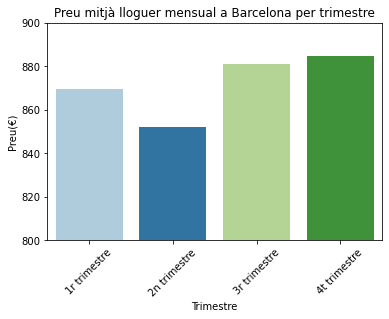

In [55]:
sns.barplot(x=preu_trimestre.index, y=preu_trimestre.values, palette='Paired')
plt.title("Preu mitjà lloguer mensual a Barcelona per trimestre", fontsize=12)
plt.xlabel("Trimestre")
plt.ylabel("Preu(€)")
plt.xticks(np.arange(4),('1r trimestre', '2n trimestre', '3r trimestre', '4t trimestre'), rotation = 45)
plt.ylim([800, 900]) #acotem els límits del preu perquè sigui més precís
plt.savefig('Preu_trimestre.png')
plt.show()

Si observem el preu mitjà de lloguer mensual per trimestre, veiem que el primer trimestre se situa al voltant dels 869€. Al segon trimestre baixa i se situa als 851€. La mala notícia és que puja força el tercer i quart trimestre, situant-se als 880 i 884€ respectivament. 

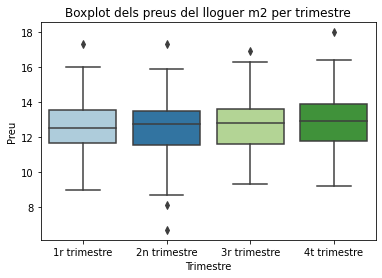

In [56]:
sns.boxplot(x='Trimestre', y='Preu',data=llog_msuper, palette='Paired')
plt.title('Boxplot dels preus del lloguer m2 per trimestre')
plt.xticks(np.arange(4),('1r trimestre', '2n trimestre', '3r trimestre', '4t trimestre'))
plt.savefig('Lloguer_trimestre_preu_snsboxplot.jpg')

Amb els boxplot podem observar les distribucions de preus per m2 i veiem que segueixen una tendència semblant que els lloguers mensuals. Hi ha algunes dades amb valors atípics, en el cas del 2n trimestre, de preu per m2 massa baix en el primer quartil, fet que pot ser un error. També hi ha outliers en el tercer quartil, però pot és més plausible. 

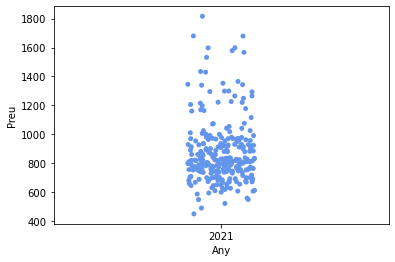

In [57]:
sns.stripplot(x= 'Any', y= 'Preu', data= llog_mitja, color='cornflowerblue')
plt.savefig('Any_distribucioPreu.png')
plt.show()

La gràfica de stripplot mostra una distibució al voltant dels 800 € i concentració important al voltant dels 700 i 900 €, la resta de registres de l'any es troben bastant dispersats. Veiem un únic punt als 1800€ però també alguns amb lloguers d'entre 400 i 600€.


#### - Tres variables (Barri o Districte, Trimestre i Preu)

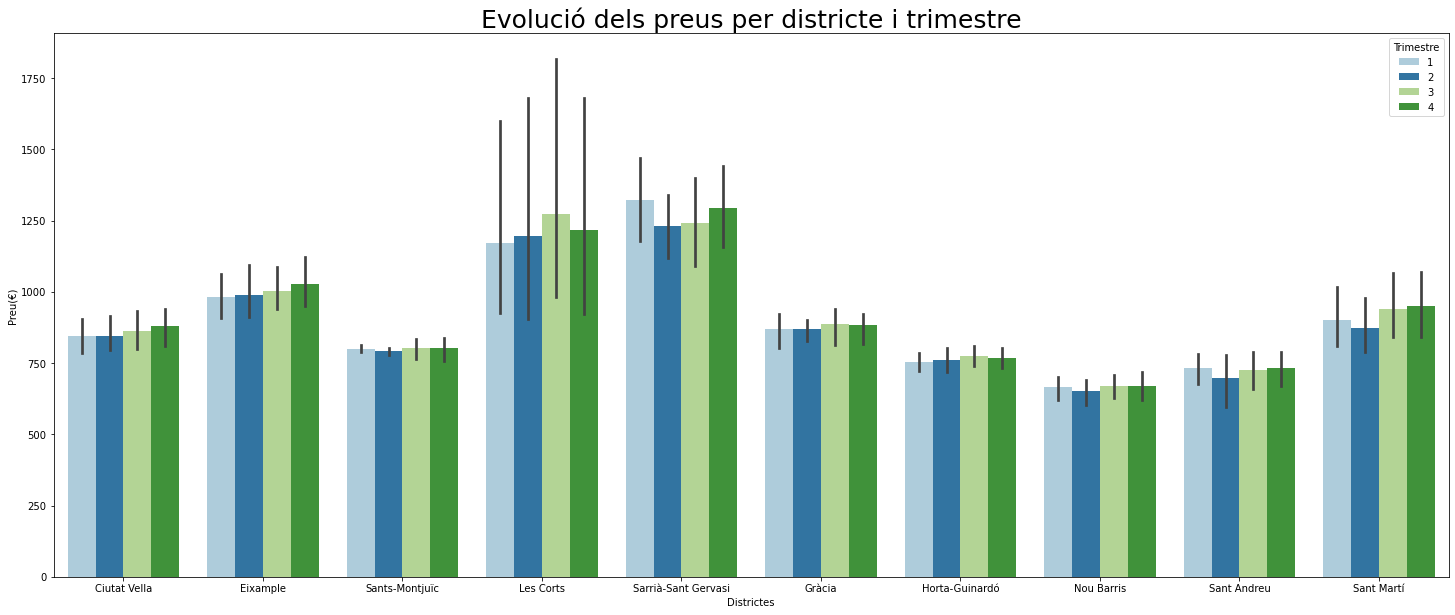

In [58]:
plt.figure(figsize=(25,10))
sns.barplot(y='Preu', x='Nom_Districte', hue='Trimestre', data=llog_mitja, palette='Paired')
plt.title("Evolució dels preus per districte i trimestre", fontsize=25)
plt.xlabel("Districtes")
plt.ylabel("Preu(€)")
plt.savefig('Districtes_preus_trimestre.png')
plt.show()

L'error estàndar aquí significa una dispersió de les dades i és molt notori al districte de Les Corts, Sarrià-Sant Gervasi i Sant Martí. Hi ha preus de lloguer, doncs, que s'allunyen força de la posició central. 

Algunes coses a destacar és la pujada gradual del lloguer al llarg dels quatre trimestres a Ciutat Vella i l'Eixample, uns districtes cada vegada més gentrificats. A districtes com a Sants-Montjuïc, Gràcia, Horta-Guinardó o Nou-Barris els preus es mantenen estables i fluctuen poc al llarg de l'any. A Sarrià-Sant Gervasi la mitjana de preus del quart trimestre és inferior a la del primer trimestre, quelcom contrari a la tendència general. 

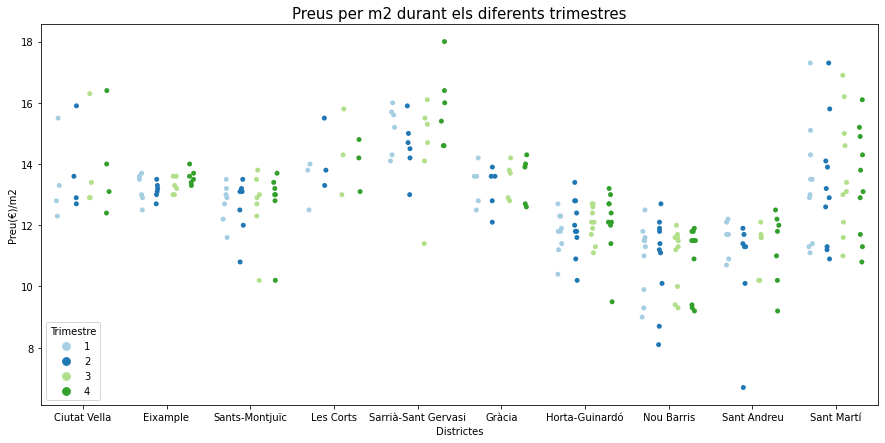

In [59]:
plt.figure(figsize=(15,7))
sns.stripplot(x='Nom_Districte', y='Preu', hue='Trimestre', data=llog_msuper, dodge=True, palette='Paired' )
plt.xlabel("Districtes")
plt.ylabel("Preu(€)/m2")
plt.title("Preus per m2 durant els diferents trimestres", fontsize=15)
plt.savefig('Districtes_preusm2_trimestre.png')
plt.show()

Quant als preus de lloguer per superfície, varien força d'un districte a un altre. La majoria es concentra al voltant dels 14-16 €/m2. Destaca un outlier del districte de Sant Andreu al segon trimestre, un preu massa baix i a Ciutat Vella, on hi ha alguns preus per m2 dels quatre trimestres força elevats. Hi ha una tendència a la pujada del primer al quart trimestre a Ciutat Vella, l'Eixample, Sarrià-Sant Gervasi i a baixar a Nou Barris i Sant Martí. No obstant això, els preus per m2 a Sant Martí es dispersen força i van dels 11 als 17€/m2 aproximadament. Juntament amb Sarrià-Sant Gervasi, Les Corts i Ciutat Vella, presenten els preus per m2 més alts. 

## - Exercici 2
#### Exporta els gràfics com imatges o com HTML.

## - Exercici 3
#### Proposa alguna visualització que creguis que pot resultar interessant.

Els barris del més car al més barat segons la mitjana de lloguer durant el 2021 a Barcelona.

In [60]:
barris_cars = llog_mitja.sort_values(by='Preu', ascending=False)
barris_cars.head(10)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
312,2021,3,4,Les Corts,21,Pedralbes,Lloguer mitjà mensual (Euros/mes),1816.5
166,2021,2,4,Les Corts,21,Pedralbes,Lloguer mitjà mensual (Euros/mes),1680.3
458,2021,4,4,Les Corts,21,Pedralbes,Lloguer mitjà mensual (Euros/mes),1679.3
20,2021,1,4,Les Corts,21,Pedralbes,Lloguer mitjà mensual (Euros/mes),1598.2
461,2021,4,5,Sarrià-Sant Gervasi,24,les Tres Torres,Lloguer mitjà mensual (Euros/mes),1597.4
23,2021,1,5,Sarrià-Sant Gervasi,24,les Tres Torres,Lloguer mitjà mensual (Euros/mes),1578.0
315,2021,3,5,Sarrià-Sant Gervasi,24,les Tres Torres,Lloguer mitjà mensual (Euros/mes),1566.5
21,2021,1,5,Sarrià-Sant Gervasi,22,"Vallvidrera, el Tibidabo i les Planes",Lloguer mitjà mensual (Euros/mes),1531.7
463,2021,4,5,Sarrià-Sant Gervasi,26,Sant Gervasi - Galvany,Lloguer mitjà mensual (Euros/mes),1433.7
169,2021,2,5,Sarrià-Sant Gervasi,24,les Tres Torres,Lloguer mitjà mensual (Euros/mes),1429.0


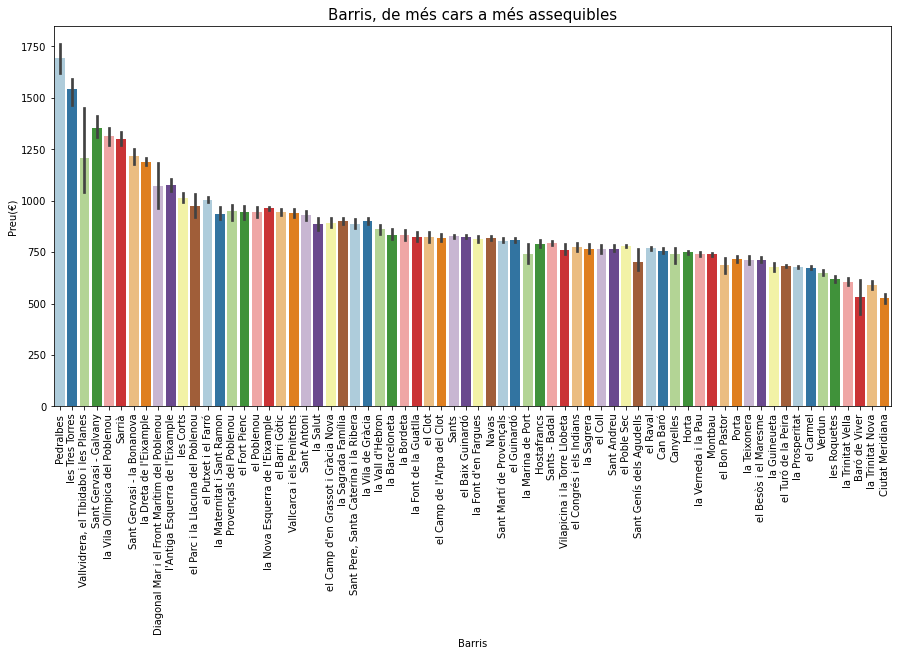

In [61]:
plt.figure(figsize=(15,7))
sns.barplot(data=barris_cars, x='Nom_Barri', y='Preu',palette='Paired')
plt.xticks(rotation = 90)
plt.xlabel("Barris")
plt.ylabel("Preu(€)")
plt.title("Barris, de més cars a més assequibles", fontsize=15)
plt.savefig('Barris_ordenats_preu.png')
plt.show()

Després de veure els districtes segons la mitjana de preus de lloguer, ara analitzem els barris. Veiem que entre els més cars es troben: Pedralbes, les Tres Torres, Vallvidrera, Tibidabo i les Planes i Sant Gervasi-Galbany. El que destaca és la barra d'error de Vallvidrera, el Tibidabo i les Planes igual que el Barri del Diagonal Mar i el Front Marítim del Poblenou. Això pot estar relacionat amb el fet que hi ha pisos i cases de molt valor i altres en estat de més deixadesa en el primer cas o pisos de nova construcció i pisos antics en el segon. Pel que fa als barris amb el lloguer més assequible, trobem Ciutat Meridiana, la Trinitat Nova i Baró de Viver.

Ara veiem una gràfica del que destina una persona amb un salari mínim interprofessional per llogar un pis a Barcelona tenint en compte el preu mitjà de lloguer.

In [62]:
llm_Barcelona = llog_mitja['Preu'].mean()
salari_min_int=1080

In [63]:
llm_Barcelona = llog_mitja['Preu'].mean()
llm_Barcelona

871.5937037037036

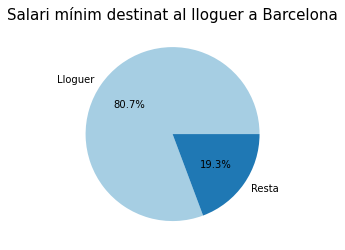

In [64]:
percentatge_lloguer = llm_Barcelona / salari_min_int * 100
percentatges = [percentatge_lloguer, 100 - percentatge_lloguer]
etiquetes = ['Lloguer', 'Resta']

fig, ax = plt.subplots()
ax.pie(percentatges, labels=etiquetes, autopct='%.1f%%', colors=sns.color_palette('Paired'))
plt.title('Salari mínim destinat al lloguer a Barcelona', fontsize=15)
plt.savefig('Salari_lloguer.png')
plt.show()

Les xifres parlen per si soles: la mitjana del preu de lloguer a Barcelona és alta, un fet que dificulta llogar un pis per sencer per a una persona amb qualsevol salari, però sobretot amb el salari mínim interprofessional.